In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [3]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [5]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [6]:
df.duplicated().sum()

49

In [7]:
df.drop_duplicates()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


In [11]:
for col in df.columns:
  n_cols = df[col].nunique()
  print("------------------------")
  print(f"The column is {col}")
  print(f"Number of counts: {n_cols}")
  print(f"Number unique values {df[col].unique()}")

------------------------
The column is Disease
Number of counts: 116
Number unique values ['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'

In [12]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Outcome Variable"] = df["Outcome Variable"] .apply(lambda x: 1 if x == "Positive" else 0)
df["Fever"] = df["Fatigue"].apply(lambda x: 1 if x == "Yes" else 0)
df["Cough"] = df["Cough"].apply(lambda x: 1 if x == "Yes" else 0)
df["Fatigue"] = df["Fatigue"].apply(lambda x: 1 if x == "Yes" else 0)
df["Difficulty Breathing"] = df["Difficulty Breathing"].apply(lambda x: 1 if x == "Yes" else 0)
df["Blood Pressure"] = df["Difficulty Breathing"].apply(lambda x: 0 if x == "Low" else 1 if x =="Normal" else 2)
df["Cholesterol Level"] = df["Cholesterol Level"].apply(lambda x: 0 if x == "Low" else 1 if x =="Normal" else 2)

In [14]:
features_to_encode = ["Disease"]

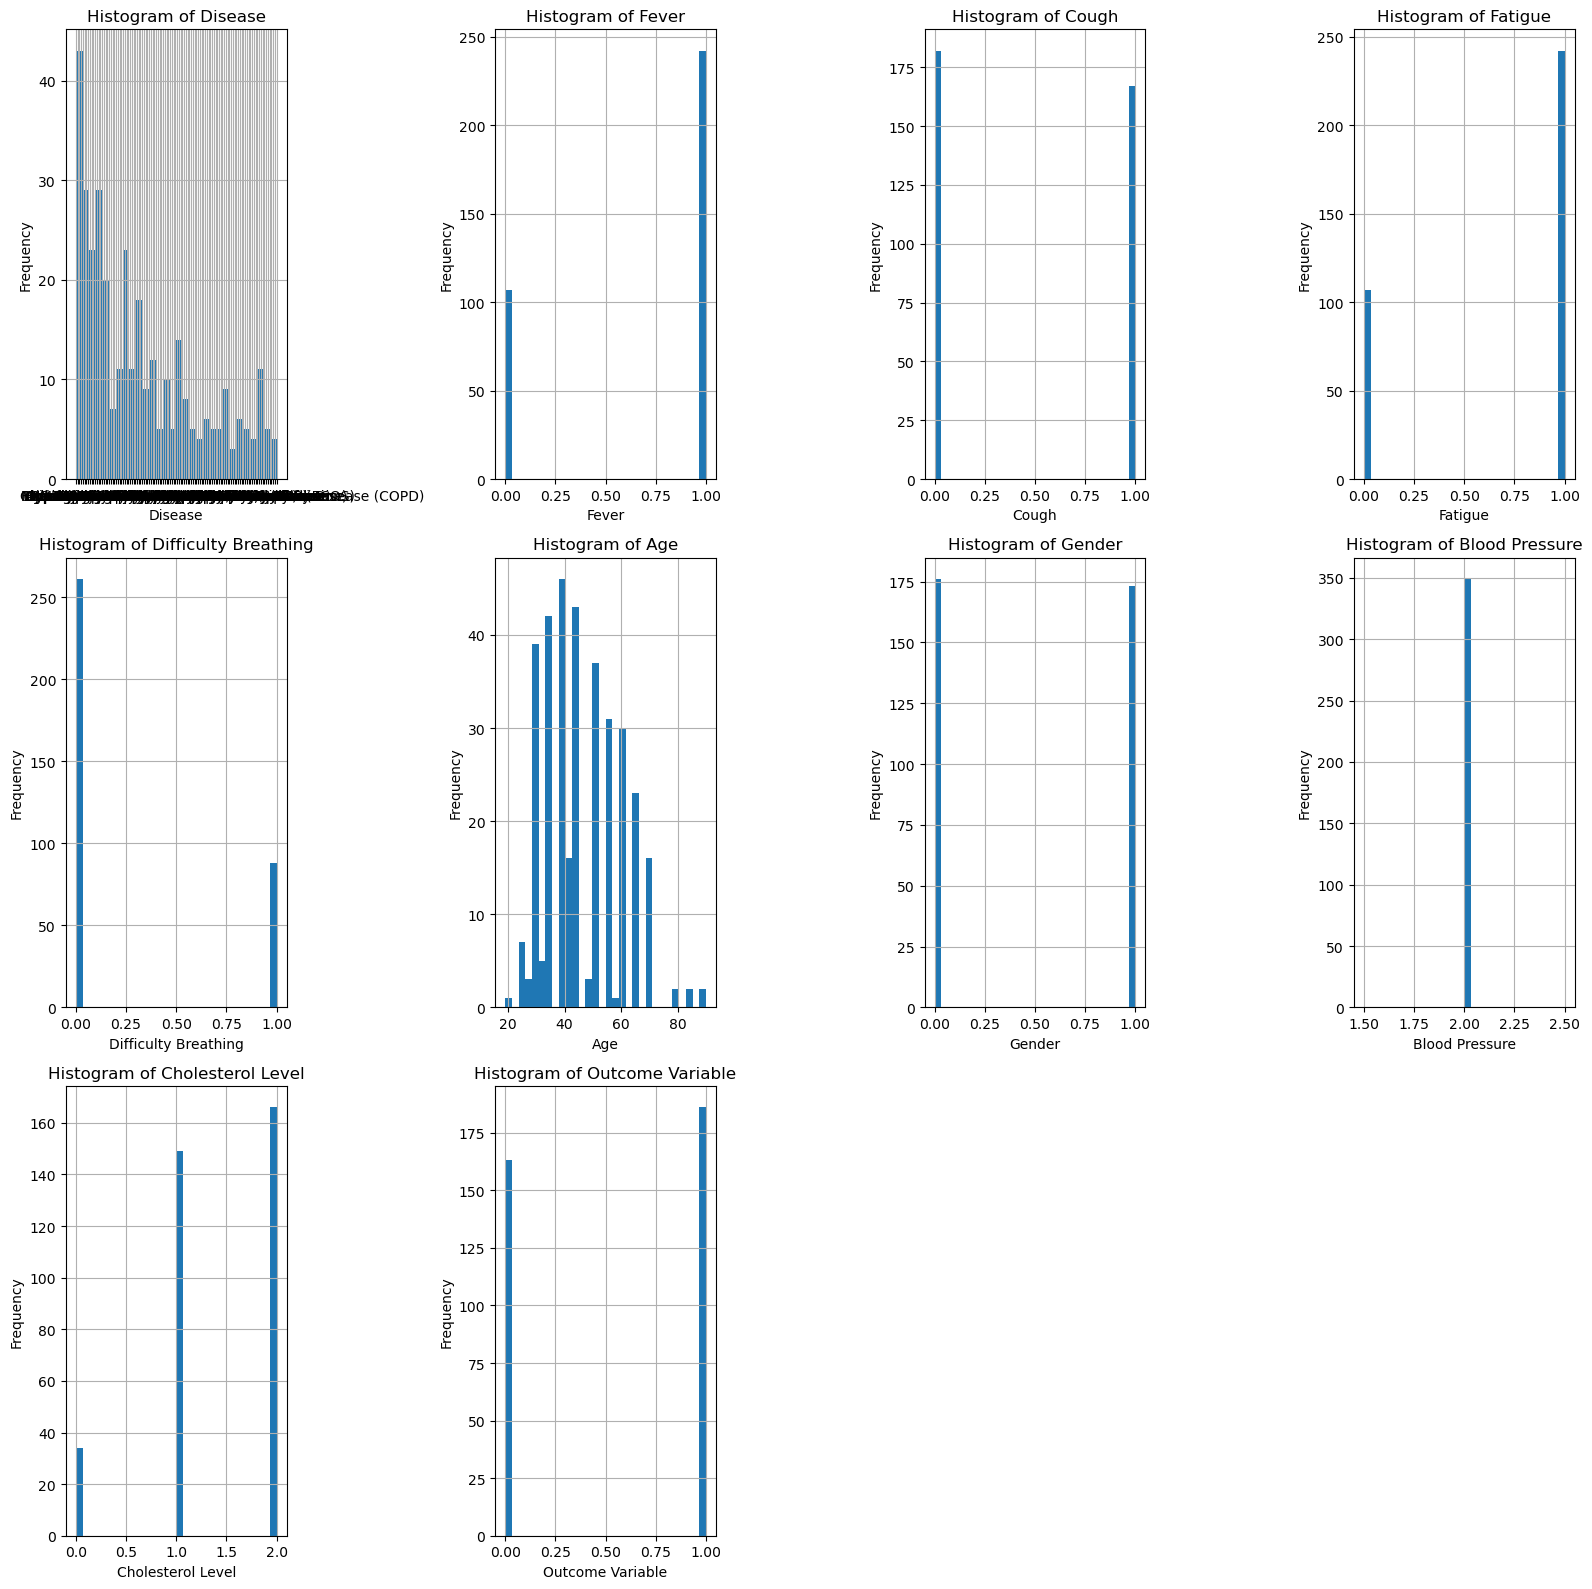

In [15]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [16]:
# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
X, y = df.drop("Outcome Variable", axis=1), df["Outcome Variable"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.6285714285714286
SVC Accuracy: 0.5428571428571428
DecisionTreeClassifier Accuracy: 0.7857142857142857
RandomForestClassifier Accuracy: 0.7714285714285715
KNeighborsClassifier Accuracy: 0.5714285714285714
GradientBoostingClassifier Accuracy: 0.6714285714285714
GaussianNB Accuracy: 0.45714285714285713
Epoch 1/50
28/28 [==============================] - 1s 782us/step - loss: 0.7231 - accuracy: 0.5197
Epoch 2/50
28/28 [==============================] - 0s 549us/step - loss: 0.6224 - accuracy: 0.6237
Epoch 3/50
28/28 [==============================] - 0s 660us/step - loss: 0.5572 - accuracy: 0.7599
Epoch 4/50
28/28 [==============================] - 0s 596us/step - loss: 0.5010 - accuracy: 0.8208
Epoch 5/50
28/28 [==============================] - 0s 864us/step - loss: 0.4517 - accuracy: 0.8530
Epoch 6/50
28/28 [==============================] - 0s 582us/step - loss: 0.4105 - accuracy: 0.8674
Epoch 7/50
28/28 [==============================] - 0s 617us/step - 

,Model,Accuracy
0,LogisticRegression,0.628571
1,SVC,0.542857
2,DecisionTreeClassifier,0.785714
3,RandomForestClassifier,0.771429
4,KNeighborsClassifier,0.571429
5,GradientBoostingClassifier,0.671429
6,GaussianNB,0.457143
7,Sequential,0.728571


In [18]:
X, y = df.drop("Outcome Variable", axis=1), df["Outcome Variable"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.6
SVC Accuracy: 0.6714285714285714
DecisionTreeClassifier Accuracy: 0.7857142857142857
RandomForestClassifier Accuracy: 0.7857142857142857
KNeighborsClassifier Accuracy: 0.6714285714285714
GradientBoostingClassifier Accuracy: 0.6714285714285714
GaussianNB Accuracy: 0.45714285714285713
Epoch 1/50
28/28 [==============================] - 0s 857us/step - loss: 0.6936 - accuracy: 0.5125
Epoch 2/50
28/28 [==============================] - 0s 768us/step - loss: 0.6748 - accuracy: 0.6201
Epoch 3/50
28/28 [==============================] - 0s 629us/step - loss: 0.6553 - accuracy: 0.6452
Epoch 4/50
28/28 [==============================] - 0s 675us/step - loss: 0.6307 - accuracy: 0.7061
Epoch 5/50
28/28 [==============================] - 0s 588us/step - loss: 0.6024 - accuracy: 0.7097
Epoch 6/50
28/28 [==============================] - 0s 596us/step - loss: 0.5672 - accuracy: 0.7599
Epoch 7/50
28/28 [==============================] - 0s 591us/step - loss: 0.5254 - 

,Model,Accuracy
0,LogisticRegression,0.600000
1,SVC,0.671429
2,DecisionTreeClassifier,0.785714
3,RandomForestClassifier,0.785714
4,KNeighborsClassifier,0.671429
5,GradientBoostingClassifier,0.671429
6,GaussianNB,0.457143
7,Sequential,0.685714
